In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.metrics import mean_squared_error

In [32]:
train=pd.read_csv('../datasets/LinearRegression/train_energy_data.csv')
test=pd.read_csv('../datasets/LinearRegression/test_energy_data.csv')
train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


<Axes: >

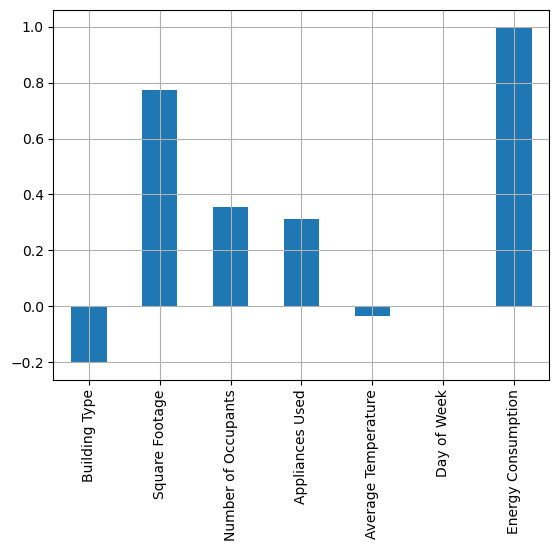

In [34]:
# scaler=StandardScaler()
# scaler.fit_transform()
encoder=LabelEncoder()

train['Building Type']=encoder.fit_transform(train['Building Type'])
train['Day of Week']=encoder.fit_transform(train['Day of Week'])

train.head()

copy=train.copy()
copy.drop('Energy Consumption',axis='columns')
copy.corrwith(train['Energy Consumption']).plot.bar(grid=True)

In [35]:
X=train.drop(['Energy Consumption','Building Type','Average Temperature','Day of Week'],axis="columns")
y=train['Energy Consumption']
X_test=test.drop(['Energy Consumption','Building Type','Average Temperature','Day of Week'],axis="columns")
y_test=test['Energy Consumption']

scaler=StandardScaler()
X=scaler.fit_transform(X,y)
X_test=scaler.fit_transform(X_test,y_test)


In [36]:
model=LinearRegression()
model.fit(X,y)
model.score(X,y)

0.8080344996004929

In [37]:
mean_squared_error(y,model.predict(X))

167048.80135392482

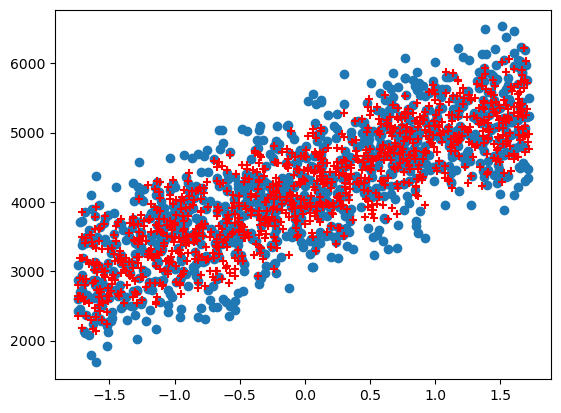

In [38]:
plt.scatter(X[:,0],y)
plt.scatter(X[:,0],model.predict(X),marker='+',c="r")

In [39]:
model=RandomForestRegressor(n_estimators=50,criterion="absolute_error")
model.fit(X,y)
model.score(X,y)

0.9637634707403211

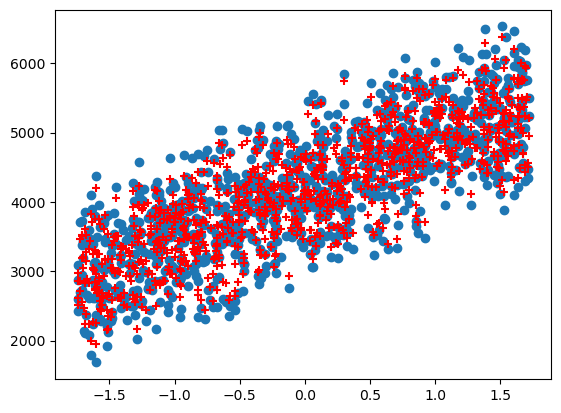

In [40]:
plt.scatter(X[:,0],y)
plt.scatter(X[:,0],model.predict(X),marker='+',c="r")
